In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
plt.()

SyntaxError: invalid syntax (<ipython-input-4-f55121301dda>, line 1)

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
sns.pairplot(df)

In [ ]:
sns.distplot(df['Price'])

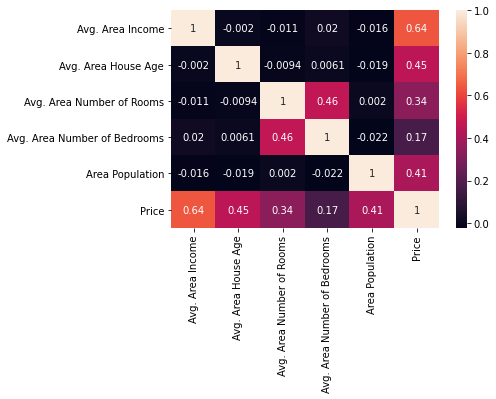

In [5]:
sns.heatmap(df.corr(), annot=True)

In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]

In [30]:
X = df[['Avg. Area Income']]
X

,Avg. Area Income
0,79545.458574
1,79248.642455
2,61287.067179
3,63345.240046
4,59982.197226
...,...
4995,60567.944140
4996,78491.275435
4997,63390.686886
4998,68001.331235


In [31]:
y =df['Price']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# random_state: the number that will be treated as a seed when generating random number. test_size: the persentile of 
# data that would be used for test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=101)


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train, y_train)

LinearRegression()

In [37]:
print(lm.intercept_)

-210001.18740504445


In [38]:
print(lm.coef_)

[21.02719844]


In [39]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Avg. Area Income,21.027198


In [40]:
predictions = lm.predict(X_test)

In [41]:
predictions

array([1194089.90073163, 1097565.46216995, 1338505.99242032, ...,
        814778.76866139, 1158482.1954199 , 1177156.93371679])

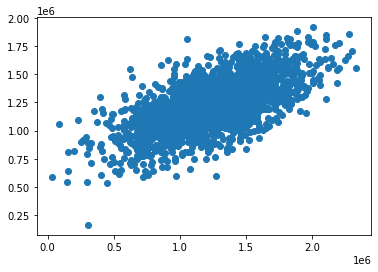

In [42]:
plt.scatter(y_test, predictions)

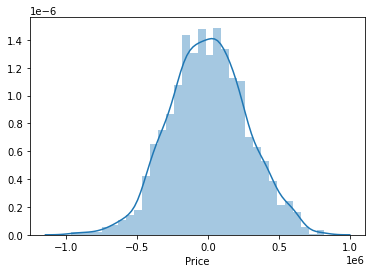

In [43]:
sns.distplot((y_test-predictions))
# If it's normally distributed, it means the model you chose is correct. If the graph is in a weried behavior, 
# change the model

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [22]:
from sklearn import metrics

In [23]:
metrics.mean_absolute_error(y_test, predictions)

82288.22251914928

In [24]:
metrics.mean_squared_error(y_test, predictions)

10460958907.208244

In [25]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922290538